# Исследование успешности игр

## Обзор данных 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st  

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv') #серверный путь 
except:
    df = pd.read_csv('C:/Users/User/Desktop/games.csv') #локальный путь

In [3]:
df.head() #выводим первые 5 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info() #получаем информацию о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().mean() #получаем информацию о доле пропусков в каждом столбце 

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [6]:
df.describe() #получение зарактеристик таблицы

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Отметим, что в таблице не представлены данные по столбцу `User_Score`, где указана оценка пользователей, так как в столбце тип данных `odject`, вместо типа `int`.

### Выводы: 

1. Из документации к данным:


* `Name` — название игры
* `Platform` — платформа 
* `Year_of_Release` — год выпуска 
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий) 
* `Other_sales` — продажи в других странах (миллионы проданных копий) 
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (Entertainment Software Rating Board), т.е. рейтинг компьютерных игр по возрастной категории


Всего в таблице 16715 строк и 11 колонок


2. Каждая строчка в таблице содержит информацию об игре:


* название игры
* платформа
* год релиза
* жанр игры
* продажи в Северной Америке
* продаже в Европе 
* продажи в Японии
* продажи в других старанах
* оценка критиков
* оценка пользователей
* рейтинг игры


3. В названии всех столбцов таблицы есть нарушения хорошего стиля: все названия столбцов начинается с верхнего регистра, необходимо привести названия столбцов к нижнему регистру.


4. В следущих столбцах есть нарушения типов данных:
* `Year_of_Release`, где указан год релиза, тип данных `float`, вместо типа `int`
* `User_Score`, где указана оценка пользователей, тип данных `odject`, вместо типа `int`


5. В столбце `Year_of_Release`, где указан год релиза игры, есть пропущенные значения.


6. В следующих столбцах есть пропущенные значения:


* `Name`(название игры) - 0.01 % 
* `Genre`(жарн игры) - 0.01 %
* `Year_of_Release`(год релиза) - 1.6 %
* `Critic_Score`(оценка критиков) - 51 %
* `User_Score`(оценка пользователей) - 40 %
* `Rating`(рейтинг игры по ESRB) - 40 %


7. В таблице представлены данные об играх с 1980 года по 2016 год


8. Минимальное количество продаж в Северной Америке, в Европе , в Японии и в дургих странах 0 млн


## Предобработка данных 

### Изменение названияй столбцов 

Все названия столбцов написаны через "верблюжий" регистр -это нарушение хорошего стиля.Приведем названия столбцов к нижнему регистру.

In [7]:
# приведем к нижнему регистру все названия столбцов 
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заполнение пропусков, изменение типов данных

Для того, что бы изменить тип данных в столбцах, сначало необходимо избавиться от пропусков в следующих  столбцах: 
* `name`(название игры) - 0.01 %,  
* `genre`(жарн игры) - 0.01 %, 
* `year_of_release`(год релиза) - 1.6 %,
* `critic_score`(оценка критиков) - 51 %, 
* `user_score`(оценка пользователей) - 40 %,
* `rating`(рейтинг игры по ESRB) - 40 %. 

#### Пропуски в столбцах "название" и "жанр"

Ознакомимся с этими пропусками:

In [8]:
df['name'].shape

(16715,)

In [9]:
df[df['name'].isna()] #получаем строки с пропусками в столбце с названием 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df[df['genre'].isna()] #получаем строки с пропусками в столбце с жанром 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропусков в столбце `name` и `genre` всего - 0.01 % , это всего пара строк и они совпадают. Удаление данных строк не повлияет на результаты исследования. Удалим строки  со занчение `NaN` в столбце с названиями:

In [11]:
df = df.dropna(subset=['name']) #удаляем строчки с NaN в столбце с названием 
df.info() #проверяем что количество строк в таблице уменьшилось 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
df['name'].shape

(16713,)

Строки с пропускаим в столбце `name` удалены из всей таблицы. Продолжим работу

#### Пропуски в столбцах "год релиза"

Ознакомимся пропусками в столбце `year_of_release`:

In [13]:
df[df['year_of_release'].isna()].head() #выводим все столбцы с пропущенным годом релиза

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [14]:
df['year_of_release'].shape

(16713,)

In [15]:
df['year_of_release'].isna().sum() #сумма пропущенных значений 

269

Учитывая небольшую долю пропусков - 1.6 % (269 значений), пропуски можно было бы оставить без изменений, или удалить.Удалим строки, что бы была возможность далее изменить тип данных в столбце.

In [16]:
df = df.dropna(subset=['year_of_release']) #удаляем строчки с NaN в столбце с годом релиза 
df.info() #проверяем удалены ли строчки 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [17]:
df['year_of_release'].shape

(16444,)

Строчки с пропущенными значениями в столбце с годом релиза удалены.

##### Изменение типа данных

Теперь исправим нарушения типа данных в столбце, где указан год релиза, с типа данных `float` на тип данных `int` (так как год-это целочисленное значение).

In [18]:
df['year_of_release'] = df['year_of_release'].astype(int) #меняем тип данных в столбце 
df.info() #проверяем что тип данных изменен

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


#### Пропуски в столбце "оценка критиков" 

Ознакомимся со столбцом `critic_Score`, где указана оценка критиков и  51 % пропущенных значений.

In [19]:
df[df['critic_score'].isna()].head(10) #выводим строчки с пропусками в столбце

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Отметим, что пропуски в столбце "оценка критиков" совпадают с пропусками в столбце "оценка пользователей".
Проверим количество пропусков в столбцах:

In [20]:
df['critic_score'].isna().sum() #подсчитываем количество строк с пропусками в "оценка критиков"

8461

Учитывая отсутствие возможности корректно заполнить пропуски, оставим пропуски в столбцах "оценка критиков" и "оценка пользователей" без изменений.

In [21]:
df['critic_score'].describe() #выводим характеристики по столбцу

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Минимальное значение в столбце - 13, максимальное - 98. Данные выглядят реалистично. Продолжим работу.

#### Пропуски в столбце  "оценка пользователей"

Ознакоимся с пропусками в столбце "оценка пользователей":

In [22]:
df[df['user_score'].isna()].head(10) #выводим строчки с пропусками в столбце

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Подсчитаем количество пропусков в столбце и получим информацию о столбце:

In [23]:
df['user_score'].isna().sum() #подсчитываем количество строк с пропусками в "оценка пользователей"

6605

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Тип данных в столбце `object`. Вероятнее всего среди пропусков есть и строковой тип данных. Ознакомимся с уникальными значениями столбца:

In [25]:
df['user_score'].value_counts().head() #получаем уникальные значения столбца с их количеством 

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

В столбце присутствует аббревиатура tbd. Вероятнее всего - имелось ввиду `To Be Determined` (будет определено) или `To Be Decided` (будет решено). Такое сокращение используется для отметки неясностей или пропусков, которые надо заполнить. То есть это те же пропуски что в других столбцах, но отмечены они иначе. Ознакомимся с пропусками:

In [26]:
df[df['user_score']=='tbd'] #выводим строки с tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце `user_score` 2424 строки с пропусками. Нельзя удалить так много данных. Что бы работать с данным столбцом, в нем должны быть представлены данные одного типа. Для этого заменим строковое значение `tbd` на 0.

In [27]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None #заменяем строковое значение на none
df[df['user_score']=='tbd'] #проверяем что строк с tbd не осталось 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце обозначали не только как `NaN`, но и как `tbd`.Подсчитаем сумму пропущенных значений после исправления строкового типа данных на тип данных `NoneType`:

In [28]:
df['user_score'].isna().sum() #подсчитываем количество пропущенных значений в столбце 

8981

In [29]:
df.info() #проверяем количество значений в стольце 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Таким образом:
* в столбце у 7463 строк указана оценка пользователей, а в 8981 строках пропущено это значение.
* строковых значений в столбце не осталось

##### Изменение типа данных

Теперь исправим тип данных в столбце `user_score`с типа данных `odject` на тип `float`, так как оценка пользователя- дробное число.

In [30]:
df['user_score'] = df['user_score'].astype(float) #исправляем тип данных
df.info() #проверяем что тип данных исправлен 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Тип данных в столбце исправлен. Проанализируем пропуски в столбце:

Оценку пользователей можем "достроить" по жанру и средней оценке пользователя в этом жанре. 
Почему жанр? Так как пользователь (так же как и критик) в каждом жанре оценивает примерно одинаковые характеристики:  
* в шутере - зрелищность перестрелки 
* в файтинге - оценивает по разнообразию боевых приёмов, по сложности и уникальности
* в приключенческих и ролевых играх - по различиям между классами героев, по сюжетному разнообразию, по количеству вариантов решения проблем
* в экшене - зрелищность, и сложность, уникальность поведения персонажей, разнообразие возможностей маскировки, уклонения
* в стратегии-правдоподобность действия боевых юнитов, разнообразие возможностей строительства разных стратегий и простота правил и так далее

Но, в таблице представлены данные с 1980 года. За 20 лет прогресс в графике, сюжетной линии, зрелищности и возможностей в играх мог значительно влиять на оценки игр,то есть играм с которым изначально ставили высокие оценки, спустя 10 лет - оценки могли как остаться прежними, так и не значительно поменяться. В связи с чем, такая замена будет не корректной. Учитывая отсутствие возможности логично заполнить пропуски - оставим пропуски в столбце без исправлений.

In [31]:
df['user_score'].describe() #получаем характеристики столбца

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Минимальное значение - 0, максимальное значение - 9.7. Медиана - 7.5, а среднее - 7.1. Данные выглядят реалистично.

#### Пропуски в столбце "рейтинг"

Далее ознакомимся со столбцом `rating`, где указан рейтинг по ESRB и пропущенно 40 % значений .

In [32]:
df[df['rating'].isna()].head() #получаем строки с пропусками в столбце 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Категория игры присваивается на оновании видеоролика, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры. 

Рейтинг напечатан на упаковке и состоит из двух частей: 
* на лицевой стороне указана одна из шести возрастных категорий, под которую игра подпадает
* на задней стороне идёт расшифровка, а также перечисляются отдельные особенности проекта

Можно было бы предположить, что рейтинг присваивается примерно одинаковый по жанру. Однако в данных представлены неоднородные потребительские рынки: Европа, Америка и Япония. Каждая из этих стран (и объеденение стран) по своему присваивает рейтинг. В связи с чем, заполнение пропусков таким образом не корректно. 

In [33]:
df['rating'].isna().sum() #получаем строки с пропусками в столбце 

6676

Можно было бы оставить пропуски в данном столбце без изменений. Но так как в столбце "рейтинг" данные категорильные-то есть возможность установить заглушку (вместо NaN-"unknown"), вместо пропусков. Это позволит в дальнейшем анализе оценить:

* возможно игр с рейтингом "unknown" больше популярны в какой-либо стране. 

Возможно, это позволит сделать дополнительные выводы.

In [34]:
df['rating'] = df['rating'].fillna(0) #заменяем все пропуущенные значения на 0
df.info() #проверяем, что замены произошли

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [35]:
df.loc[df['rating'] == 0 , 'rating'] = 'unknown' #заменяем 0  на unknown
df[df['rating']== 0 ] #проверяем что строк с 0 не осталось 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Подсчет общего количества продаж

В таблице есть данные по продажам в различных старанх. В дальнейшем для анализа нам понадобится суммарнаое количество продаж по каждой игре. Поэтому, подсчитаем суммарное количество продаж во всех странах и внесем данные в отдельный столбец `total_sale`:

In [36]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [37]:
#подсчитаем суммарное количество продаж
df['total_sale'] = df[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis='columns')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Суммарные продажи успешно подсчитаны и добавлены в таблицу. Посмотрим на характеристики нового столбца:

In [38]:
df['total_sale'].describe() #выводим характеристики столбца 

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sale, dtype: float64

Минимальная сумма продаж - 0 проданных копий, максимальное - 82.540..000 млн проданных копий Средняя сумма продаж - 536.023 тыс  проданных копий, медиана  продаж - 170.000 тыс проданных копий

### Выводы: 

Таким образом, при предобработке данных мы:


1. Исправили нарушения хорошего стиля в названиям столбцов 

2. Изменили тип данных на соотествующий содержанию столбца: 

* `Year_of_Release`, где указан год релиза, на тип данных `float`
* `User_Score`, где указана оценка пользователей,на тип данных `odject`


4. Не заполнили пропуски в столбце из-за отсутствия корректной замены:

* `Critic_Score`(оценка критиков) - 51 %
* `User_Score`(оценка пользователей) - 40 %
* `Rating`(рейтинг игры по ESRB) - 40 %


5. Удалили данные, которые не подлежали восстановлению:
* `Name`(название игры) - 0.01 % 
* `Genre`(жарн игры) - 0.01 %
* `Year_of_Release`(год релиза) - 1.6 %


6. В столбце `Rating`(рейтинг игры по ESRB) вместо пропусков ввели "заглушку" - `unknown`


## Исследовательский анализ

В таблице представлены данные об играх, выпущенных на всех платформах за период с 1980 года по 2016 год. Но есть платформы, которые были (и есть) более популярными. На эти платформы  выпускалось больше игр. Так же в таблице представлены данные с 1980 года. Это слишком большой период, необходимо его сократить.Тогда встает 2 вопроса:
* какие платформы наиболее популярны? 
* сколько игр выпускалось в разные года и какой период нам важен?


### Наиболее популярные платформы

Определим наиболее популярные платформы

In [39]:
#группируем таблицу и подсчитываем количество игр по платформам
platform_group = df.groupby('platform')['year_of_release'].agg({'count'}).sort_values(by='count', ascending=False)
platform_group = platform_group.reset_index() #убираем мультииндекс
platform_group.head()

,platform,count
0,PS2,2127
1,DS,2121
2,PS3,1306
3,Wii,1286
4,X360,1232


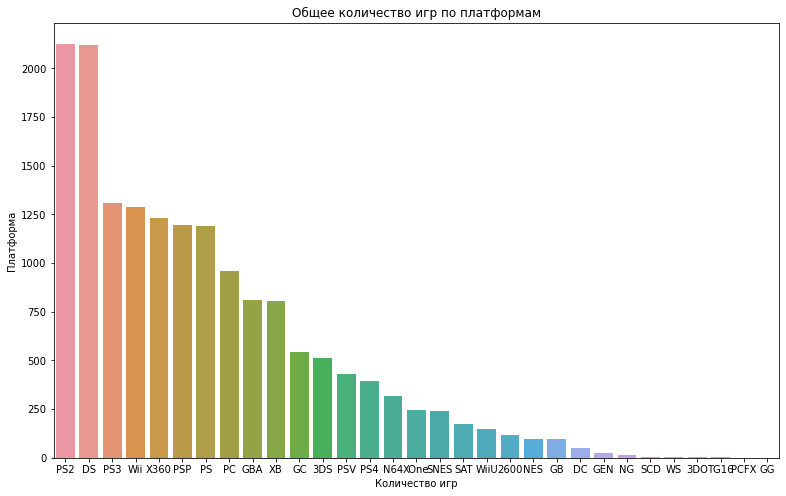

In [40]:
plt.figure(figsize=(13,8)) #изменяем размер графика
#строим гистограмму количества проадж
ax = sns.barplot(x="platform", y="count", data=platform_group)
ax.set(title='Общее количество игр по платформам')
ax.set_xlabel('Количество игр')
ax.set_ylabel('Платформа');

#### Вывод:

Итак, по графику мы видим, что максимальное количество игр, выпущенных на одну платформу может быть больше 2000 игр. Тогда список наиболее популярных платформ будем брать с количеством выпущенных на нее игр вдое меньше, то есть наиболее популярные платформы - это платформы, но которые количество игр, выпущенных за все года больше 1000 игр:

* PS2
* DS
* PS3
* Wii
* X360
* PSP
* PS

   
За все года на остальные платформы было выпущено меньше 1000 игр.


### Актуальный период для исследования

Рассмотрим, общее количество игр, которое выпускалось в разные года и ответим на вопрос: какой период нам важен?

In [41]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [42]:
#группируем таблицу и подсчитываем количество игр по годам 
year_group = df.groupby('year_of_release')['name'].agg({'count'})
year_group = year_group.reset_index() #убираем мультииндекс

year_group.head(10)

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


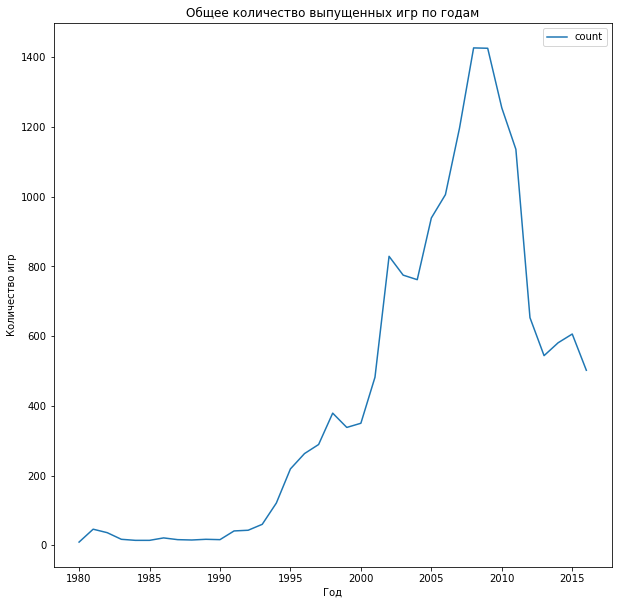

In [43]:
#строим график для сравнения количества игр по годам и выявления актуального периода
year_group.plot(
    x='year_of_release', 
    y='count',
    xlabel='Год',
    ylabel='Количество игр',
    figsize=(10,10),
    title='Общее количество выпущенных игр по годам');

#### Вывод: 

По графику видно, что примерно с 2005 года пошел пик выпуска игр: в год выпускали больше 800 игр. Пик количества выпускаемых игр был в 2010 году. Примерно в 2013 году общее количество выпускаемых игр за год упало ниже 600 игр в год.

Таким образом, предположительно - актуальным для нас периодом, когда выпускалось больше всего игр - будет период с 2010 года по 2016 год.

Рассмотрим данное преположение на распределении количества выпущенных игр на самые популярные платформы .

### Рассмотрим распределение по годам для самых популярных платформ 

Посмотрим, как менялись продажи по наиболее популярным платформам (платформ с наибольшими суммарными продажами), которые мы выявили раннее, что бы выявить актуальный период для анализа.

Для этого сначала сформируем таблицу с наиболее популярными платформами, а затем сформируем сводную таблицу, где будет указан год релиза и на какие платформы и сколько игр вышло.

In [44]:
#формируем таблицу с наиболее популярными платформами
platform = df.query(
    'platform == "DS" or platform == "PS2" or platform == "Wii" or platform == "PS3" or platform == "PS" or platform == "PSP" or platform == "X360"')

platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [45]:
platform2 = df.pivot_table(index='platform', values='total_sale', aggfunc= 'sum').sort_values('total_sale', ascending=False)

platform2.index[:7].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

Создадим таблицу с количеством выпущенных игр для каждой платформы

In [46]:
#формируем сводную таблицу по количеству выпущенных игр на платформы
popular_platform = platform.pivot_table(index='year_of_release',
                                 columns='platform',
                                 values='name',
                                 aggfunc = 'count')

popular_platform = popular_platform.reset_index() #убираем мультииндекс
popular_platform.head()

platform,year_of_release,DS,PS,PS2,PS3,PSP,Wii,X360
0,1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,17.0,NaN,NaN,NaN,NaN,NaN
2,1995,NaN,99.0,NaN,NaN,NaN,NaN,NaN
3,1996,NaN,164.0,NaN,NaN,NaN,NaN,NaN
4,1997,NaN,188.0,NaN,NaN,NaN,NaN,NaN


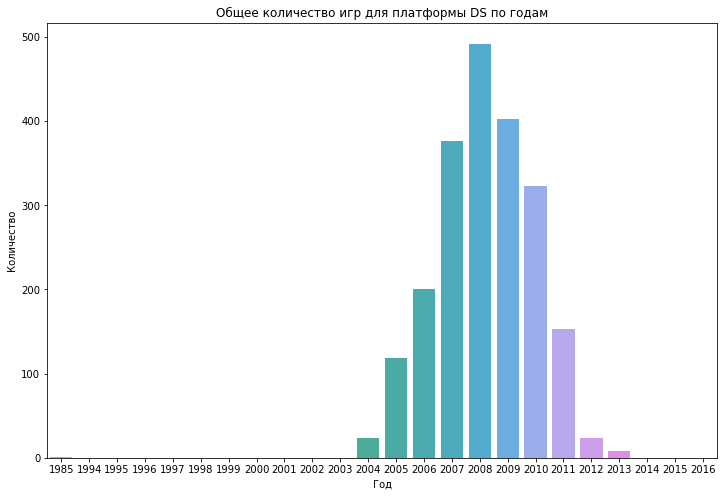

In [47]:
plt.figure(figsize=(12,8)) #изменяем размер графика

ax = sns.barplot(x="year_of_release", y="DS", data=popular_platform) #строим гистограмму количества проадж
ax.set(title='Общее количество игр для платформы DS по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

По графику видно, что платформа `DS` была:

* популярна с 2004 года по 2013 год
* пик популярности (или актуальный период для платформы) с 2007 по 2010 год, то есть 3 года
* полное отсутствие новых игр с 2014 года


Таким образом, срок исчезновения игр на данную платформу - 9 лет.

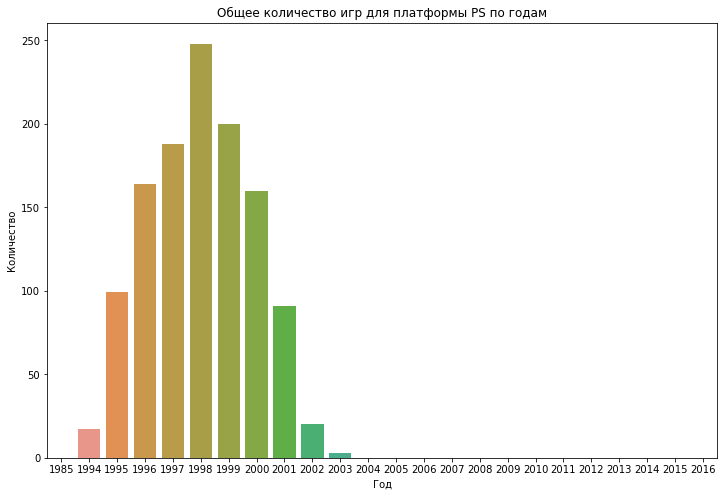

In [48]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="year_of_release", y="PS", data=popular_platform)
ax.set(title='Общее количество игр для платформы PS по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

Из графика следует, что платформа `PS` была:
* популярна с 1994 по 2003 год  
* на пике популярности с 1996 по 2000 год, то ест ьактуальный период-4 года
* полное отсутствие новых игр с 2004 года

Срок исчезновения игр на данную платформу - 9 лет.

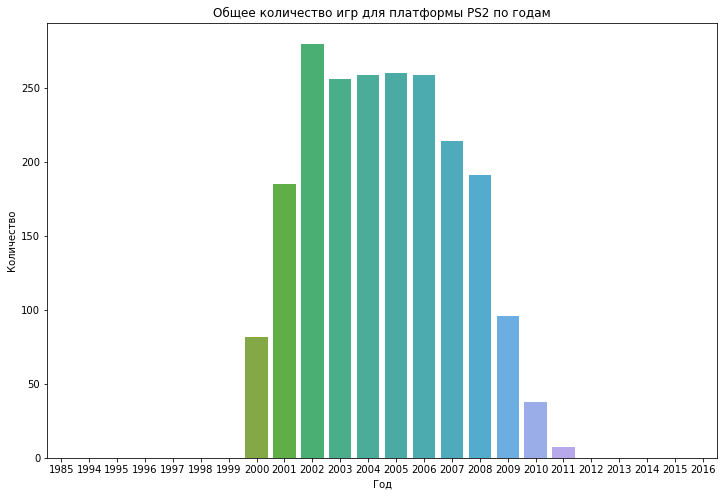

In [49]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="year_of_release", y="PS2", data=popular_platform)
ax.set(title='Общее количество игр для платформы PS2 по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

Судя по графику, платформа `PS2` была:
* популярна с 2000 по 2011 год
* на пике популярности с 2002 года по 2006 год, то есть актуальный период -4 года
* отсутствие новых игр на платформу отмечается с 2012 года

Таким образом, срок исчезновения игр на данную платформу 11 лет.

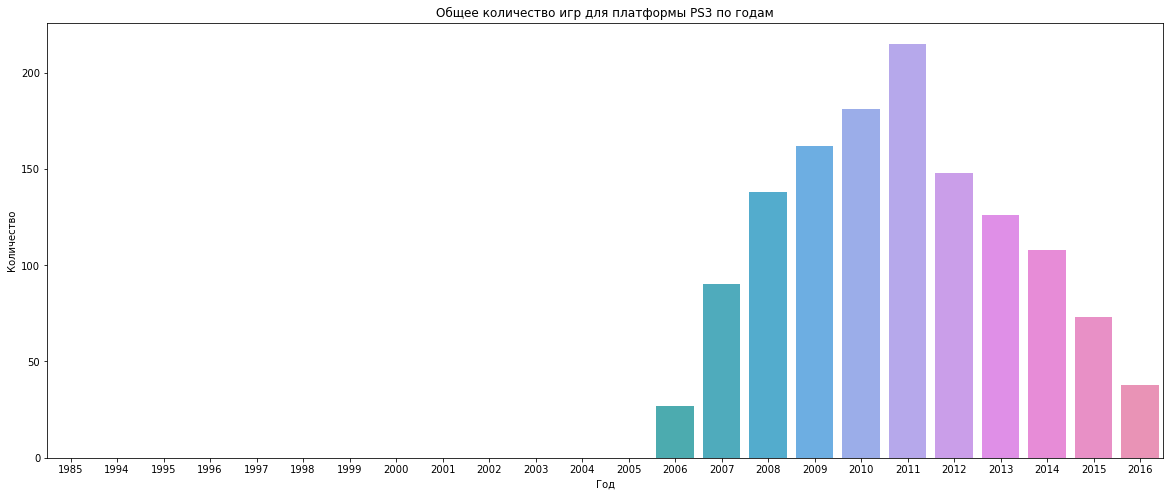

In [50]:
plt.figure(figsize=(20,8)) 
ax = sns.barplot(x="year_of_release", y="PS3", data=popular_platform)
ax.set(title='Общее количество игр для платформы PS3 по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

По графику видно, что платформа `PS3` была:
* популярна с 2005 по 2016 год
* пик популярности был с 2009 по 2013 год, то есть актуальный период- 4 года
* полного отсутсвия новых игр на платформу не отмечается. 

В связи с чем, нельзя навзать срок исчезновения. Но можно отметить, что игры на данную платформу были востребованы вплоть до выгрузки данных (2016 года), то есть около 11 лет

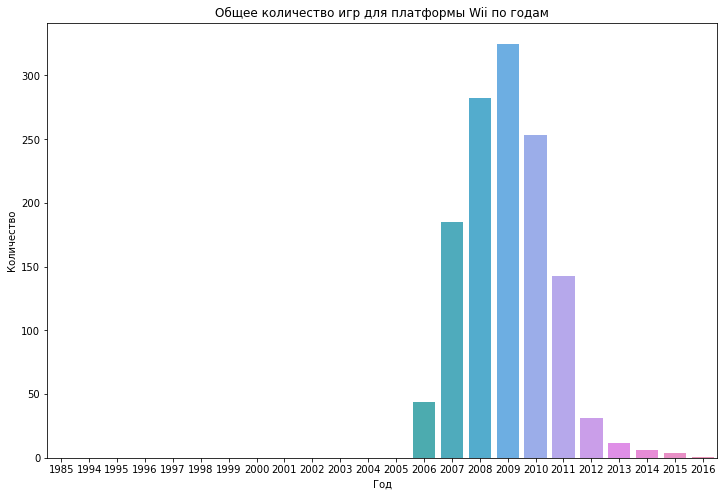

In [51]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="year_of_release", y="Wii", data=popular_platform)
ax.set(title='Общее количество игр для платформы Wii по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

Из графика следует, что платформа `Wii` была:
* популярна с 2006 по 2016 год
* на пике популярности с 2007 по 2010 год, то есть актуальный период 3 года
* почти полное отсутствие новых игр с 2016 года

Таким образом, можно сказать, что исчезновения игр на данную платформу-10 лет.

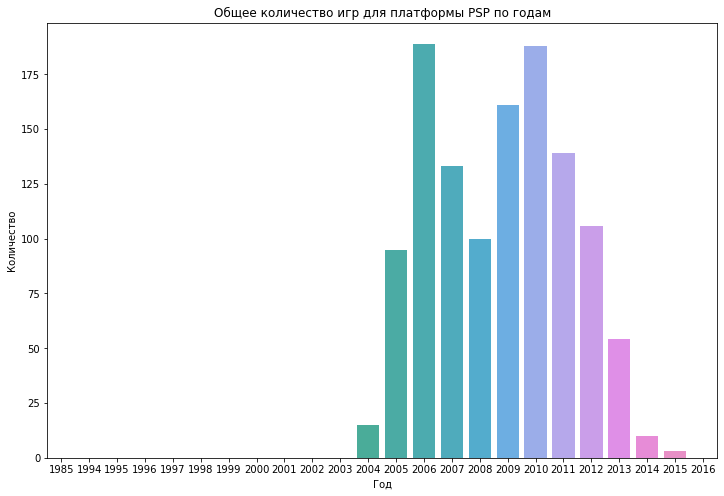

In [52]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="year_of_release", y="PSP", data=popular_platform)
ax.set(title='Общее количество игр для платформы PSP по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

По графику видно, что платформа `PSP` была:
* популярна с 2004 по 2015 год
* пик популярности был в 2006 годы и с 2008 по 2012 год, актуальный период - 4 года
* полное отсутсвия новых игр на платформу отмечается с 2016 года

Срок исчезновения новых игр на платформу - 11 лет. 

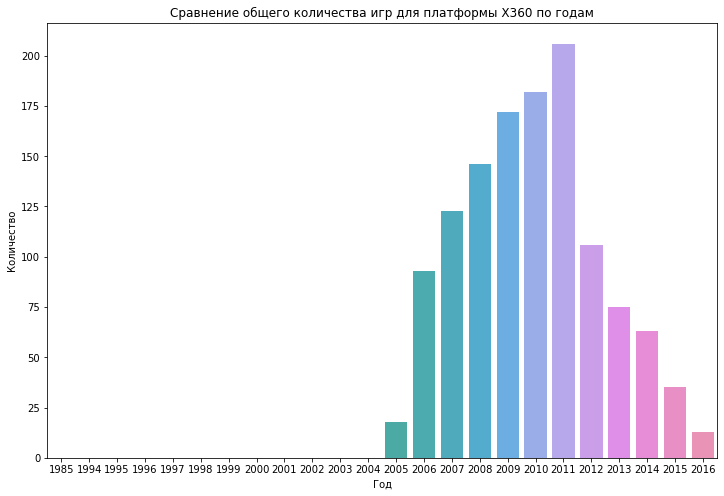

In [53]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="year_of_release", y="X360", data=popular_platform)
ax.set(title='Сравнение общего количества игр для платформы X360 по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество');

По графику, что платформа `X360` была:

* популярная с 2005 по 2016 год
* на пике популярности с 2007 по 2011 год и актуальный период - 4 года.
* снижение количества выпускаемых игр на платформу отмечается с 2016 года. 

Так как спрос на данную платформу все еще есть, нельзя сказать, что о сроке исчезновении игр на данную платформу. Но можно сказать, что спрос на платформу сохранялся около 11 лет.

#### Вывод:
* характерный период жизни платформ в среднем около 10 лет.За этот срок исчезают старые платформы и появляются новые
* актуальный период жизни платформы 4 года


Теперь, когда мы уточнили понятие актуальный период, можем сформировать таблицу с данными по актуальному периоду:

In [54]:
data = df.query('year_of_release >= 2012')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Наиболее прибыльные платформы

Мы определили, каков актуальный период. Теперь опеределим наиболее прибыльные платформы в таблице с актуальным периодом.

In [55]:
new_popular_platform = data.groupby('platform')['total_sale'].agg({'sum'}).sort_values(by='sum', ascending=False)
new_popular_platform = new_popular_platform.reset_index()
new_popular_platform.head()

,platform,sum
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


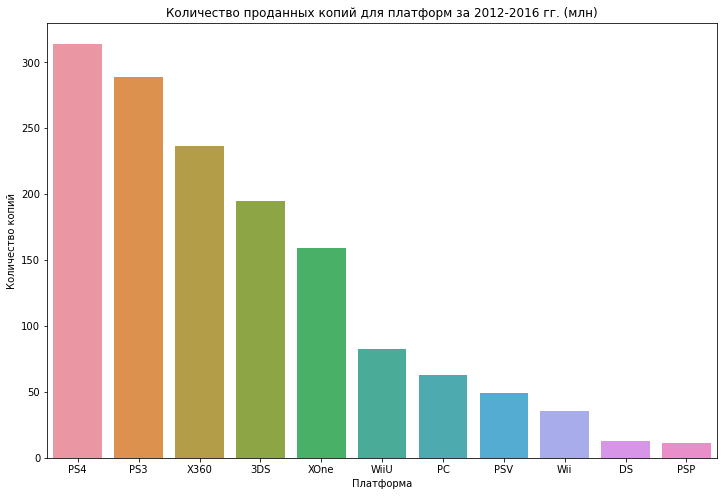

In [56]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x="platform", y="sum", data=new_popular_platform)
ax.set(title='Количество проданных копий для платформ за 2012-2016 гг. (млн)')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество копий');

По графику видно, что есть платформы, которые лидируют по продажам. Общая прибыль за актуальный период больше всего на платформах: 
* PS4
* PS3
* X360
* 3DS
* XOne


Отметим, что по графику, есть платформы намного менее прибыльные:
* DS
* PSP
* Wii
* PC
* PSV
* WiiU



In [57]:
total_sale_pivot = data.pivot_table(index=['platform','year_of_release'], values='total_sale', aggfunc='sum')
total_sale_pivot.head()

total_sale
platform year_of_release            
3DS      2012                  51.36
         2013                  56.57
         2014                  43.76
         2015                  27.78
         2016                  15.14

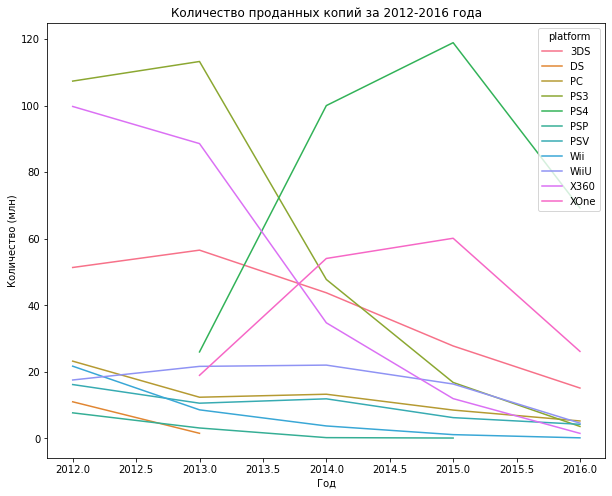

In [58]:
plt.figure(figsize=(10,8)) 
ax = sns.lineplot(x="year_of_release", y='total_sale',hue="platform", legend=True, data=total_sale_pivot)
ax.set(title='Количество проданных копий за 2012-2016 года')
ax.set_xlabel('Год')
ax.set_ylabel('Количество (млн)');

#### Вывод:

По графику видно, что платформ, по которым количество проданных копий:

* растет-нет, но есть потенциально прибыльные: 
  * PS4
  * XOne
  * 3DS
  * PSV
  * PC
  * WiiU
  * PS3

* падает - это:
  * DS
  * PSP
  * Wii
  * X360
  
  
  Таким образом, мы выявили самые потенциально прибыльные платформы. И далее будем работать только с наиболее потенциально прибыльными платформами

### Продажи по наиболее потенциально прибыльным платформам

Сформируем таблицу для дальнейшей работы, где будут данные по актуальному периоду  и оценим продажи по наиболее прибыльным платформам.

In [59]:
#формируем таблицу с наиболее потенциально прибыльными платформами
df_popular = data.query(
    'platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "PSV" or platform == "PC" or platform == "WiiU" or platform == "PS3"')

df_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [60]:
pivot = data.pivot_table(index=['platform','year_of_release'], 
                           values='total_sale', 
                           aggfunc='sum').sort_values('total_sale', ascending=False)
pivot.head()

total_sale
platform year_of_release            
PS4      2015                 118.90
PS3      2013                 113.25
         2012                 107.36
PS4      2014                 100.00
X360     2012                  99.74

In [61]:
tmp = df.query('year_of_release >= 2012')
tmp.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [62]:
tmp \
    .groupby(by=['platform']) \
    .agg({'total_sale': 'sum'}) \
    .sort_values(by=['total_sale'], ascending=False) \
    .query('total_sale > 100') \
    .index \
    .tolist()

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Посмотрим на распределение продаж для каждой платформы.

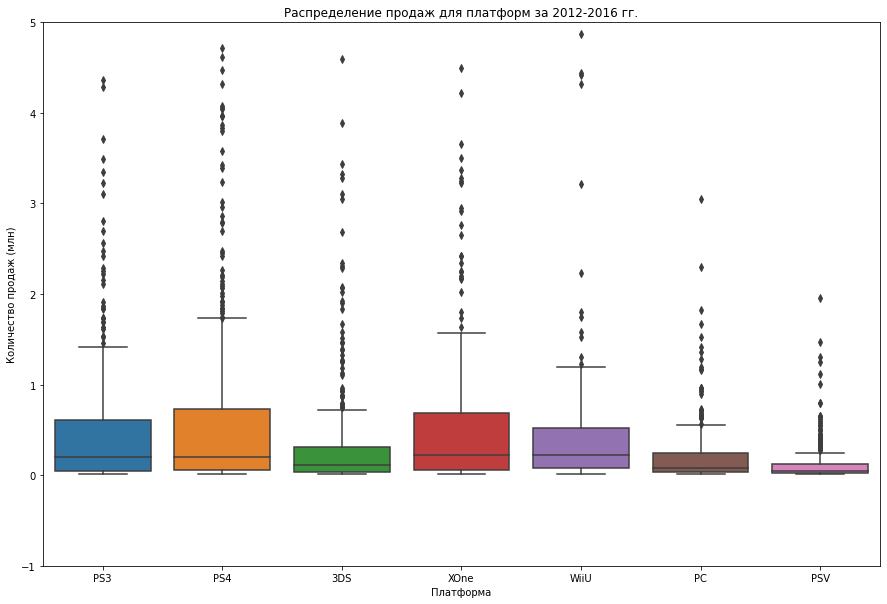

In [63]:
plt.figure(figsize=(15,10)) 
ax = sns.boxplot(y='total_sale',x='platform',data=df_popular )
ax.set(title='Распределение продаж для платформ за 2012-2016 гг.')
ax.set_ylim(-1,5);
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество продаж (млн)');

Увеличим масштаб графика, что бы определить медиану

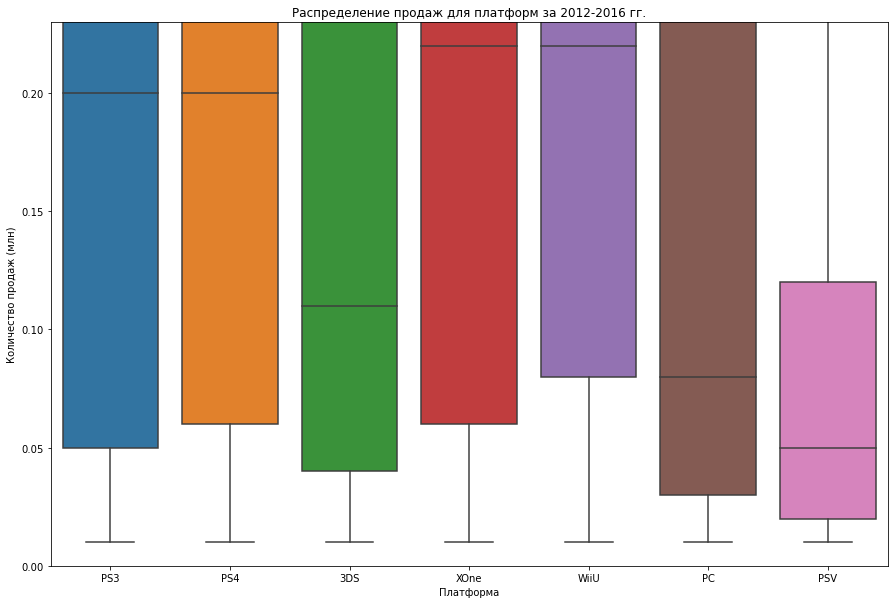

In [64]:
plt.figure(figsize=(15,10)) 
ax = sns.boxplot(y='total_sale',x='platform',data=df_popular )
ax.set(title='Распределение продаж для платформ за 2012-2016 гг.')
ax.set_ylim(0, 0.23);
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество продаж (млн)');

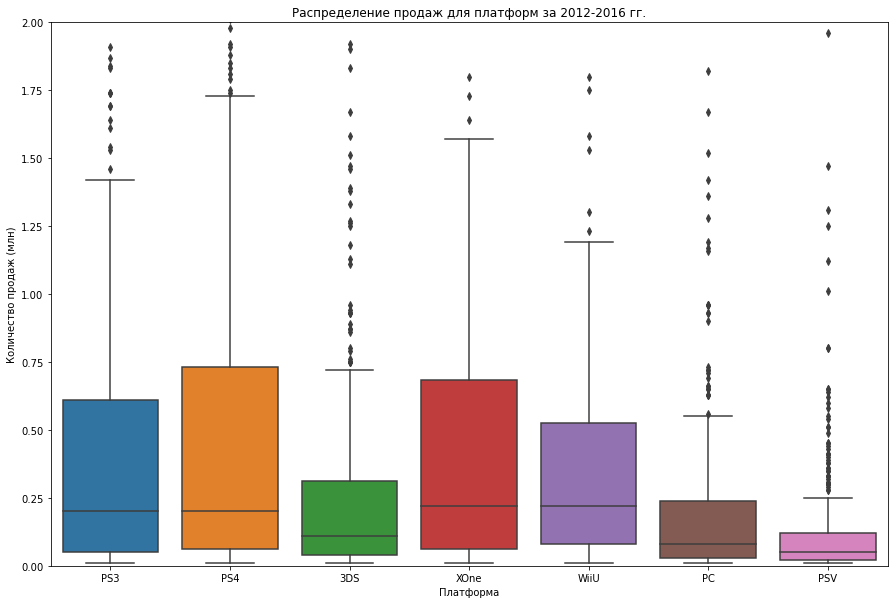

In [65]:
plt.figure(figsize=(15,10)) 
ax = sns.boxplot(y='total_sale',x='platform',data=df_popular )
ax.set(title='Распределение продаж для платформ за 2012-2016 гг.')
ax.set_ylim(0,2);
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество продаж (млн)');

#### Выводы: 


Отметим, что в данном случае, за пределами "усов" графиков располагаются не выбросы, а "очень успешные" игры по продажам. То есть количество выбросов за передлами усов- это количество очень успешных игр с большим количеством продаж.

По графику видно, что продажи между наиболее популярным платформам распределены не равномерно:

1. Есть платформы, где количество "успешных" игр намного больше: 
  * PS3
  * PS4
  * XOne
  * WiiU
  * 3DS
  
Медиана количества продаж у этих платформ примерно одинаковая-примерно 200 тыс. копий у `PS3`,`PS4` и около 220 тыс. копий у `XOne`, `WiiU`. Разброс значений у данных платформ так же примерно одинаковый (примерно больше 2 млн копий.)
На платформе `3DS` количество игр так же велико, однако общее количество игр на данную платформу не велико, за счет чего медиана чуть меньше (примерно 100.000 тыс.), чем у других платформ.

2. Есть платформы, где количество "успешных" игр намного меньше: 
  * PS
  * PSV
  
  
Медиана количества продаж у этих платформ примерно одинаковая-меньше 50.000 тыс. копий. Разброс значений у данных платформ так же примерно одинаковый (примерно до 2 млн копий.) 
   


### Влияние оценок на продажи для каждой платформы

Оценим, влияют ли на продажи оценки критиков и пользователей?

In [66]:
df_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Сформируем таблицу, где будут столбцы с данными по платформе, оценками критиков и пользователей, и суммарным  количеством проданных копий (в млн).

In [67]:
cols = ['platform', 'critic_score', 'user_score', 'total_sale'] #оставляем необходимые нам столбцы в переменной

In [68]:
score_sale = df_popular[cols] #отфильтровываем от отстальных столбцов 
score_sale.head()

,platform,critic_score,user_score,total_sale
16,PS3,97.0,8.2,21.05
31,PS4,NaN,NaN,14.63
33,3DS,NaN,NaN,14.60
34,PS3,83.0,5.3,13.79
42,PS4,97.0,8.3,12.62


Для начала вспомним, какие платформы представлены в таблице:

In [69]:
score_sale['platform'].value_counts() # уникальные значения столбца с количеством 

PS3     493
PSV     411
3DS     396
PS4     392
PC      250
XOne    247
WiiU    147
Name: platform, dtype: int64

Проанализируем каждую платформу отдельно. Для этого данные по каждой платформе выделеим отдельно .

In [70]:
psv = score_sale.query('platform == "PSV"') #формируем таблицу только по одной платформе
psv.head()

,platform,critic_score,user_score,total_sale
868,PSV,NaN,NaN,1.96
1294,PSV,33.0,4.8,1.47
1485,PSV,70.0,7.2,1.31
1595,PSV,88.0,8.6,1.25
1831,PSV,93.0,9.2,1.12


In [71]:
psv.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.699199,0.094488
user_score,0.699199,1.000000,-0.004339
total_sale,0.094488,-0.004339,1.000000


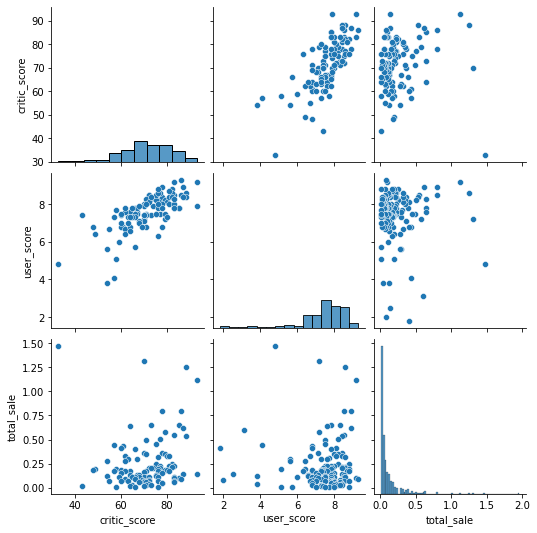

In [72]:
sns.pairplot(psv); #выводим матрицу диаграммы рассеяния

По графику видно, что корреляции между оценкой критиков или пользователей и количестом проданных копий на платформу `PSV` нет.

In [73]:
ds3 = score_sale.query('platform == "3DS"') #формируем таблицу только по одной платформе
ds3.head()

,platform,critic_score,user_score,total_sale
33,3DS,NaN,NaN,14.60
47,3DS,NaN,NaN,11.68
62,3DS,78.0,7.2,9.90
73,3DS,88.0,8.7,9.17
96,3DS,NaN,NaN,7.55


In [74]:
ds3.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sale,0.320803,0.197583,1.000000


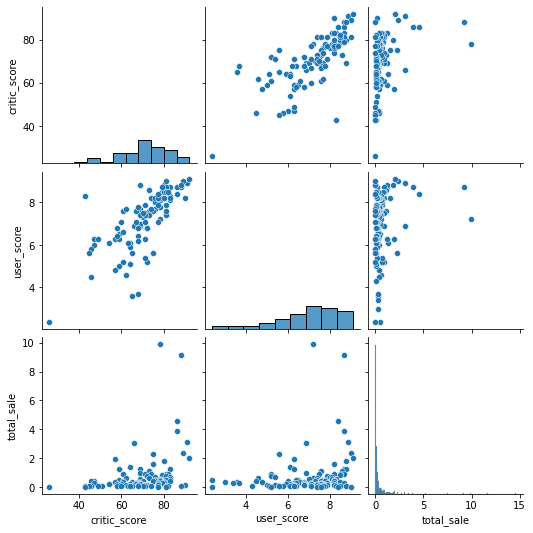

In [75]:
sns.pairplot(ds3); #выводим матрицу диаграммы рассеяния

Судя по графику, корреляция между оценкой критиков и количестом проданных копий на платформу `3DS` положительная, но слабая, так же как и корреляция между оценкой пользователей и количеством продаж.

In [76]:
ps4 = score_sale.query('platform == "PS4"') #формируем таблицу только по одной платформе
ps4.head()

,platform,critic_score,user_score,total_sale
31,PS4,NaN,NaN,14.63
42,PS4,97.0,8.3,12.62
77,PS4,82.0,4.3,8.58
87,PS4,NaN,NaN,7.98
92,PS4,83.0,5.7,7.66


In [77]:
ps4.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sale,0.406568,-0.031957,1.000000


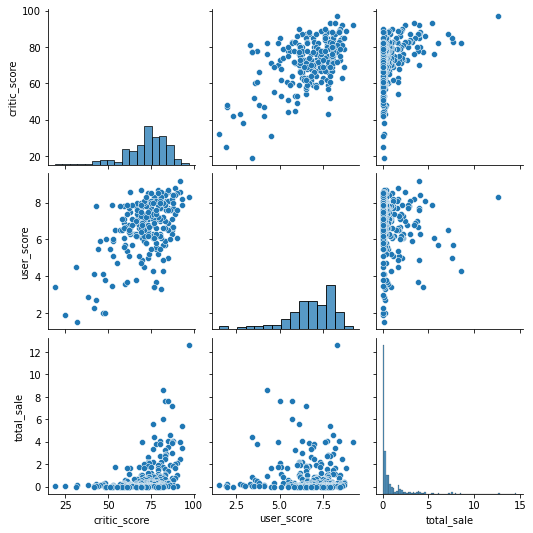

In [78]:
sns.pairplot(ps4); #выводим матрицу диаграммы рассеяния

По графику видно, что корреляция между оценкой критиков и количестом проданных копий на платформу `PS4` положительная,умеренная: то есть, чем выше оценка критика, тем больше продажи. Между оценками пользователей и количестом проданных копий на платформу корреляции нет.

In [79]:
pc = score_sale.query('platform == "PC"') #формируем таблицу только по одной платформе
pc.head()

,platform,critic_score,user_score,total_sale
192,PC,88.0,4.0,5.14
458,PC,70.0,3.9,3.05
688,PC,90.0,7.9,2.30
959,PC,82.0,4.8,1.82
1095,PC,86.0,7.9,1.67


In [80]:
pc.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sale,0.237243,-0.121867,1.000000


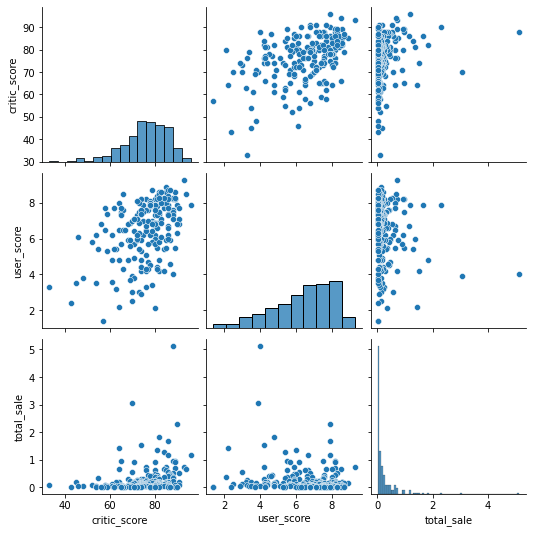

In [81]:
sns.pairplot(pc); #выводим матрицу диаграммы рассеяния

По графику видно, что корреляция между оценкой критиков  количестом проданных копий на платформу `PC` положительная, но слабая.Между оценками пользователей и количестом проданных копий на платформу корреляции нет.

In [82]:
xone = score_sale.query('platform == "XOne"') #формируем таблицу только по одной платформе
xone.head()

,platform,critic_score,user_score,total_sale
99,XOne,NaN,NaN,7.39
165,XOne,97.0,7.9,5.47
179,XOne,81.0,5.4,5.26
242,XOne,84.0,6.4,4.49
270,XOne,88.0,6.2,4.22


In [83]:
xone.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sale,0.416998,-0.068925,1.000000


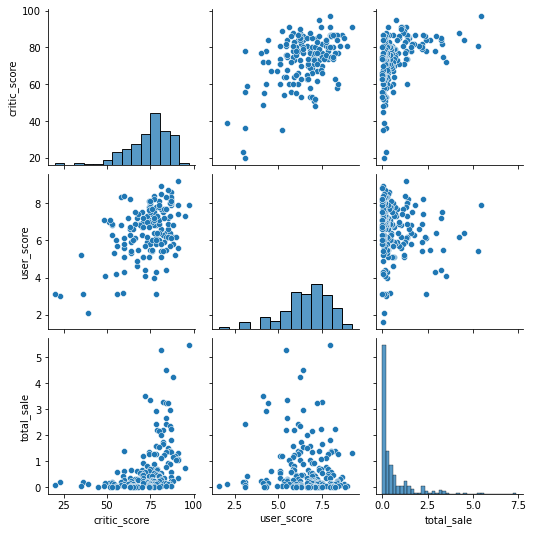

In [84]:
sns.pairplot(xone); #выводим матрицу диаграммы рассеяния

Судя по графику, корреляция между оценкой критиков и количестом проданных копий на платформу `XOne` положительная, умеренная.Между оценками пользователей и количестом проданных копий на платформу корреляции нет.

In [85]:
wiiu = score_sale.query('platform == "WiiU"') #формируем таблицу только по одной платформе
wiiu.head()

,platform,critic_score,user_score,total_sale
110,WiiU,88.0,9.1,7.09
185,WiiU,84.0,8.1,5.23
216,WiiU,NaN,NaN,4.87
247,WiiU,81.0,8.5,4.44
248,WiiU,77.0,7.9,4.42


In [86]:
wiiu.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sale,0.34838,0.400219,1.000000


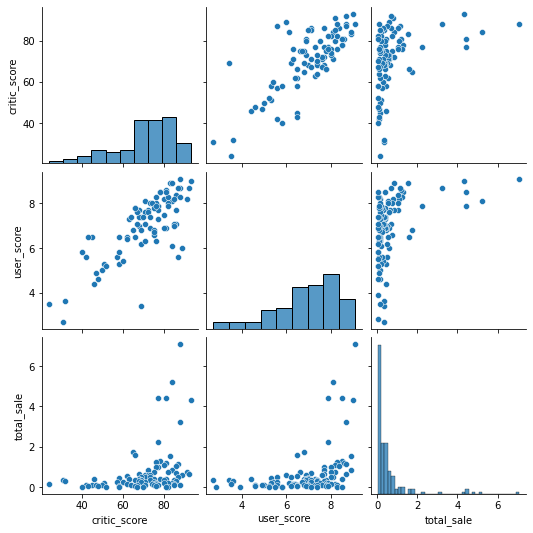

In [87]:
sns.pairplot(wiiu); #выводим матрицу диаграммы рассеяния

По графику видно, что есть корреляция как между оценкой критиков и количестом проданных копий на платформу `WiiU` , так и между оценкой пользователей и количестом проданных копий на платформу `WiiU`. В обоих случаях корреляция положительная, умеренная: то есть чем выше оценки, тем выше количество продаж.

In [88]:
ps3 = score_sale.query('platform == "PS3"') #формируем таблицу только по одной платформе
ps3.head()

,platform,critic_score,user_score,total_sale
16,PS3,97.0,8.2,21.05
34,PS3,83.0,5.3,13.79
69,PS3,71.0,2.6,9.36
81,PS3,88.0,6.6,8.17
126,PS3,86.0,4.3,6.46


In [89]:
ps3.corr() #выводим таблицу с коэффициентом корреляции 

,critic_score,user_score,total_sale
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
total_sale,0.331497,-0.005144,1.000000


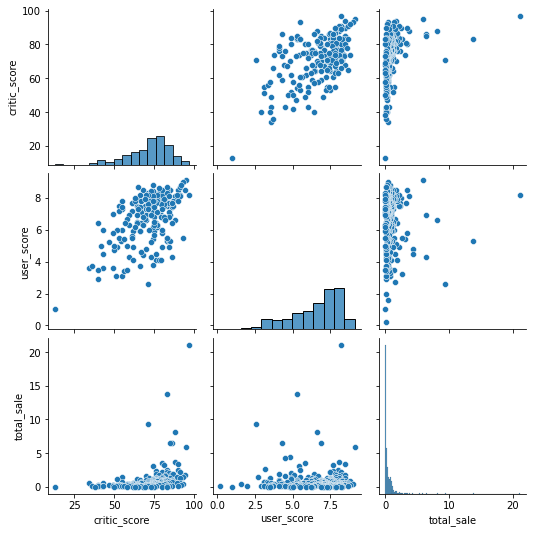

In [90]:
sns.pairplot(ps3); #выводим матрицу диаграммы рассеяния

По графику видно, что корреляция между оценкой критиков и количестом проданных копий на платформу `PS3` положительнвя, умеренная.Между оценками пользователей и количестом проданных копий на платформу корреляции нет.

#### Вывод :

По графикам видно, что:  
* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе WiiU

* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе 3DS

* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PS4, PS3, XOne
* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PC

* корреляции между оценкой критиков или пользователей и суммарным количеством проданных копий нет на платформу PSV.


### Распределение игр по жанрам

In [91]:
df_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Для начала оценим распределение игр по жанрам для каждой платформы.

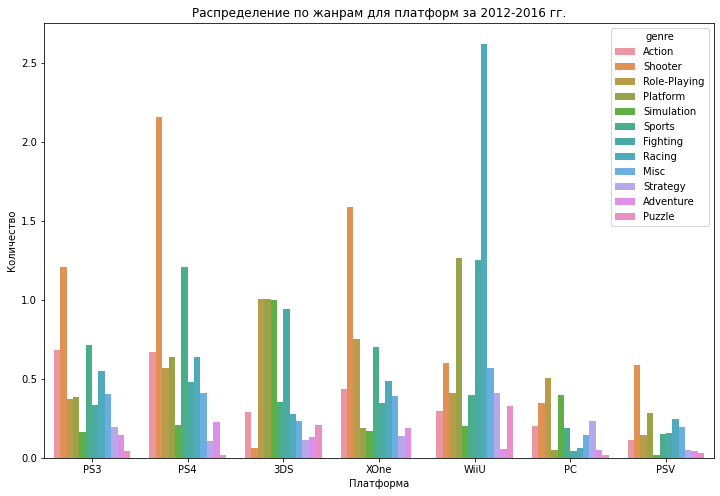

In [92]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x = 'platform', y='total_sale', hue="genre",  data=df_popular, ci=None)
ax.set(title='Распределение по жанрам для платформ за 2012-2016 гг.')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество');

По графику видно, что распределение по жанрам для всех платформ не одинаковое:
* для платформы `PS4` чаще выпускают игры в жанре `shooter` и `sport`
* для платформы `PS3` чаще выпускают игры в жанре `shooter` и `sport`
* для платформы `3DS` наиболее популярные жанры - это: `role-playing`, `platform`, `simulation` и `fighting`
* для платформы `Xone` наиболее популярные жанры - это: `shooter`, `role-playing` и `sport`
* для платформы `WiiU` наиболее популярные жанры - это: `racing`, `fighting` и `platform`
* для платформы `PC`наиболее популярные жанры - это:`role-playing` и `simulation`
* для платформы `PSV` наиболее популярные жанры - это: `shooter` и  `platform`

Что бы оценить распределение игр по жанрам в целом, сгруппируем таблицу:

In [93]:
#группируем таблицу
genre_group = df_popular.groupby('genre')['name'].agg({'count'}).sort_values(by='count',ascending=False)
genre_group = genre_group.reset_index()
genre_group.head()

,genre,count
0,Action,830
1,Role-Playing,323
2,Adventure,229
3,Sports,205
4,Shooter,186


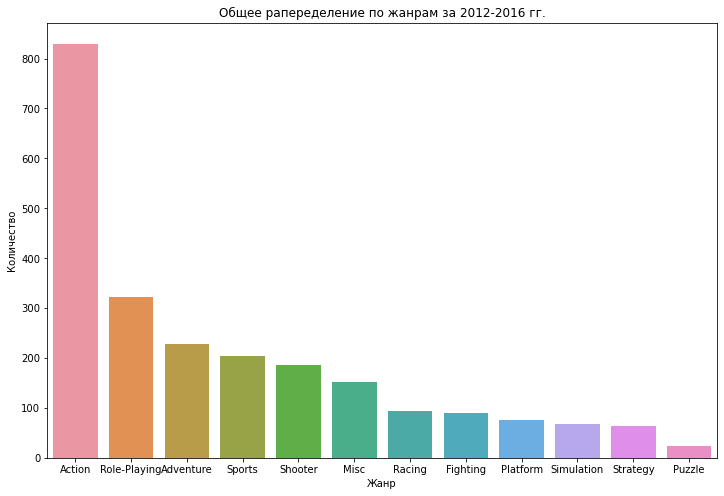

In [94]:
plt.figure(figsize=(12,8)) 
ax = sns.barplot(x = 'genre', y='count', data=genre_group)
ax.set(title='Общее рапеределение по жанрам за 2012-2016 гг.')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество');

По графику можно сказать, что общее распределние по жанрам неравномерно: 
1. наиболее популярные жанры - это:
* action
* role-playing
* adventure
* shooter
* sport
* misc

В этих жанрах выпущено более 100 игр

2. наименее популярные жанры - это:
* fighting
* platform
* puzzle
* racing
* simulation
* strategy

Оценим общее количество проданных копий в зависимости от жанра: 

In [95]:
#группируем таблицу
genre_sale = df_popular.groupby('genre')['total_sale'].agg({'median'}).sort_values(by='median',ascending=False)
genre_sale = genre_sale.reset_index()
genre_sale.head()

,genre,median
0,Shooter,0.435
1,Sports,0.240
2,Platform,0.240
3,Role-Playing,0.150
4,Fighting,0.130


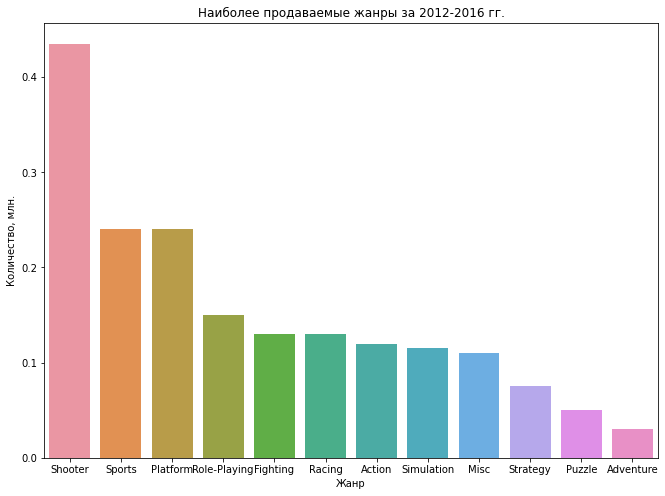

In [96]:
plt.figure(figsize=(11,8)) 
ax = sns.barplot(x = 'genre', y='median', data=genre_sale)
ax.set(title='Наиболее продаваемые жанры за 2012-2016 гг.')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество, млн.');

#### Выводы:


По графику видно, что количество продаж по жанарам распеределено неравномерно:
1. Наиболее прибыльные жанры-это жанры, медиана количества продаж которых более 200 тыс копий:

* shooter (самый прибыльный жанр)
* sports
* platform


2. Наименее прибыльные жанры-это жанры, медиана количества продаж котрых менее 50 тыс копий:
* puzzle
* adventure

3. Медиана количества проданных копий остальных жанров находится в промежутке от 50 тыс до 150 тыс копий:
* role-playing
* fighting
* racing
* action
* simulation
* misc
* strategy 

4. Так же по графику можно сказать, что есть:
жанр с наиболее высокой медианой количества проданных копий - это shooter
жанр с наиболее низкиой медианой количества проданных копий - это adventure

### Промежуточные выводы :

В ходе исследования мы выявили следующие вопросы и ответили на них:

**1. На какие платформы выпускалось больше всего игр, то есть какие платформы наиболее популярны?**

Наиболее популярные платформы - это платформы, но которые количество игр, выпущенных за все года больше 1000 игр:

* DS
* PS2
* Wii
* PS3
* PS
* PSP
* X360

**2. Какой период (в годах) является актуальным для анализа.**

Срок исчезновения игр на платформу (то есть исчезновения самой платформы) - 10 лет 
Актуальный период жизни платформы - 4 года


**3. Выявили платформы, которые лидируют по продажам и потенциально самые прибыльные:**

Есть платформы, которые лидируют по продажам и потенциально самые прибыльные. Общая прибыль за актуальный период больше всего на платформах: 
* PS3
* PS4
* XOne
* 3DS
* PSV
* PC
* WiiU


**4. Рассмотрели продажи по наиболее потенциально прибыльным платформам:**

Выявили, что продажи между наиболее популярным платформам распределены не равномерно.

Есть платформы, где количество "успешных" игр намного больше: 
  * PS4
  * XOne
  * WiiU
  * 3DS


Есть платформы, где количество "успешных" игр намного меньше: 
  * PS
  * PSV
  
**5. Рассмотрели влияние оценок на продажи для каждой платформы.**

Выявили, что:  
* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе WiiU


* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе 3DS


* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PS4, PS3, XOne


* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PC


* корреляции между оценкой критиков или пользователей и суммарным количеством проданных копий нет на платформу PSV.


**6. Рассмотрели распределение игр по жанрам.**

**Выявили, что распределение по жанрам для всех платформ не одинаковое:**
* для платформы `PS4` чаще выпускают игры в жанре `shooter` и `sport`
* для платформы `PS3` чаще выпускают игры в жанре `shooter` и `sport`
* для платформы `3DS` наиболее популярные жанры - это: `role-playing`, `platform`, `simulation` и `fighting`
* для платформы `Xone` наиболее популярные жанры - это: `shooter`, `role-playing` и `sport`
* для платформы `WiiU` наиболее популярные жанры - это: `racing`, `fighting` и `platform`
* для платформы `PC`наиболее популярные жанры - это:`role-playing` и `simulation`
* для платформы `PSV` наиболее популярные жанры - это: `shooter` и  `platform`

**Выяснили, что медианное количество продаж по жанрам неравномерно:**


Наиболее прибыльные жанры-это жанры, медиана количества продаж которых более 200 тыс копий:

* shooter (самый прибыльный жанр)
* sports
* platform


Наименее прибыльные жанры-это жанры, медиана количества продаж котрых менее 50 тыс копий:
* puzzle
* adventure

Медиана количества проданных копий остальных жанров находится в промежутке от 50 тыс до 150 тыс копий:
* role-playing
* fighting
* racing
* action
* simulation
* misc
* strategy 

Так же отметим, что есть:

* жанр с наиболее высокой медианой количества проданных копий - это shooter
* жанр с наиболее низкиой медианой количества проданных копий - это adventure

## Анализ пользователей по регионам

В нашем исследовании представлены данные о количестве проланных копий  по 3 регионам:
* Северной Америке
* Европе
* Японии

1. Проанализируем самые популярные платформы и жанры  в зависимости от региона и составим топ-5 платформ и жанров для кажого региона

2. Проанализиуем, влияет ли рейтинг ESRB на продажи в каждом регионе.

### Топ-5 популярных платформ в регионе

In [97]:
df_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Сначала выберем топ-5 платформ по общему количеству проданных копий для каждой платформы и в каждом регионе.

In [98]:
#формируем сводную таблицу по общему количеству проданных копий
sale_platform = df_popular.pivot_table(index='platform', 
                       values=['na_sales','eu_sales','jp_sales'],
                       aggfunc=np.sum).sort_values(by=['na_sales','eu_sales','jp_sales'], ascending=False)
sale_platform = sale_platform.reset_index()
sale_platform

,platform,eu_sales,jp_sales,na_sales
0,PS4,141.09,15.96,108.74
1,PS3,106.86,35.29,103.38
2,XOne,51.59,0.34,93.12
3,3DS,42.64,87.79,55.31
4,WiiU,25.13,13.01,38.10
5,PC,37.76,0.00,19.12
6,PSV,11.36,21.04,10.98


In [99]:
#переводим сумму в доли продаж

sale_platform['eu_sales'] = sale_platform['eu_sales'] / sale_platform['eu_sales'].sum() * 100

sale_platform['jp_sales'] = sale_platform['jp_sales'] / sale_platform['jp_sales'].sum() * 100

sale_platform['na_sales'] = sale_platform['na_sales'] / sale_platform['na_sales'].sum() * 100

sale_platform

,platform,eu_sales,jp_sales,na_sales
0,PS4,33.880844,9.202560,25.362099
1,PS3,25.660975,20.348267,24.111953
2,XOne,12.388637,0.196045,21.718950
3,3DS,10.239416,50.619847,12.900292
4,WiiU,6.034628,7.501586,8.886297
5,PC,9.067550,0.000000,4.459475
6,PSV,2.727949,12.131696,2.560933


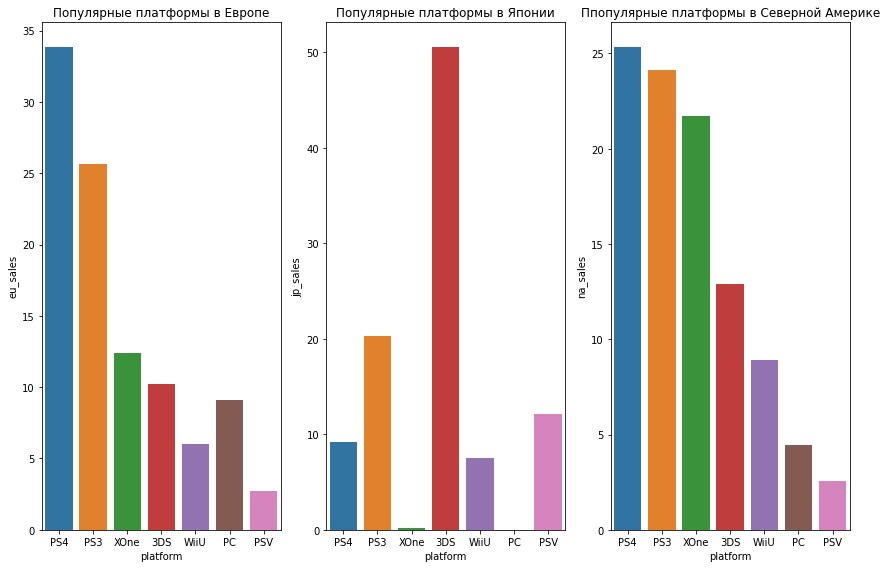

In [100]:
#рисуем все графики на одной фигуре


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


sns.barplot(x = 'platform', y='eu_sales', data=sale_platform, ax=ax1)
sns.barplot(x = 'platform', y='jp_sales', data=sale_platform, ax=ax2)
sns.barplot(x = 'platform', y='na_sales', data=sale_platform, ax=ax3)

ax1.set(title='Популярные платформы в Европе')
ax2.set(title='Популярные платформы в Японии')
ax3.set(title='Ппопулярные платформы в Северной Америке');

fig.tight_layout()

#### Выводы:

Таким образом, мы определили самые популярные платформы в разных регионах:

1. Топ-5 платформ для Европы составляет:
* PS4 (наиболее популярная)
* PS3
* XOne
* 3DS
* PC 

2. Топ-5 платформ для Японии составляет:
* 3DS (наиболее популярная)
* PS3 
* PSV 
* PS4
* WiiU

3. Топ-5 платформ для Северной Америки составляет:
* PS4 (наиболее популярная)
* PS3
* XOne
* 3DS
* WiiU

### Топ-5 популярных жанров в регионе

Рассмотрим самые популярные жанры  в зависимости от региона и составим топ-5 платформ и жанров для каждого региона

In [101]:
#формируем сводную таблицу
genre_top = df_popular.pivot_table(index='genre', 
                       values=['na_sales','eu_sales','jp_sales'],
                       aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales'], ascending=False)
genre_top = genre_top.reset_index()
genre_top

,genre,eu_sales,jp_sales,na_sales
0,Action,126.63,48.21,125.38
1,Shooter,92.18,8.71,100.07
2,Sports,57.68,6.90,57.37
3,Role-Playing,43.97,57.92,54.59
4,Platform,19.44,8.63,22.72
5,Misc,15.63,11.31,19.62
6,Fighting,9.58,8.92,16.60
7,Racing,23.01,2.44,13.91
8,Adventure,8.23,6.52,6.95
9,Simulation,14.00,10.22,6.85


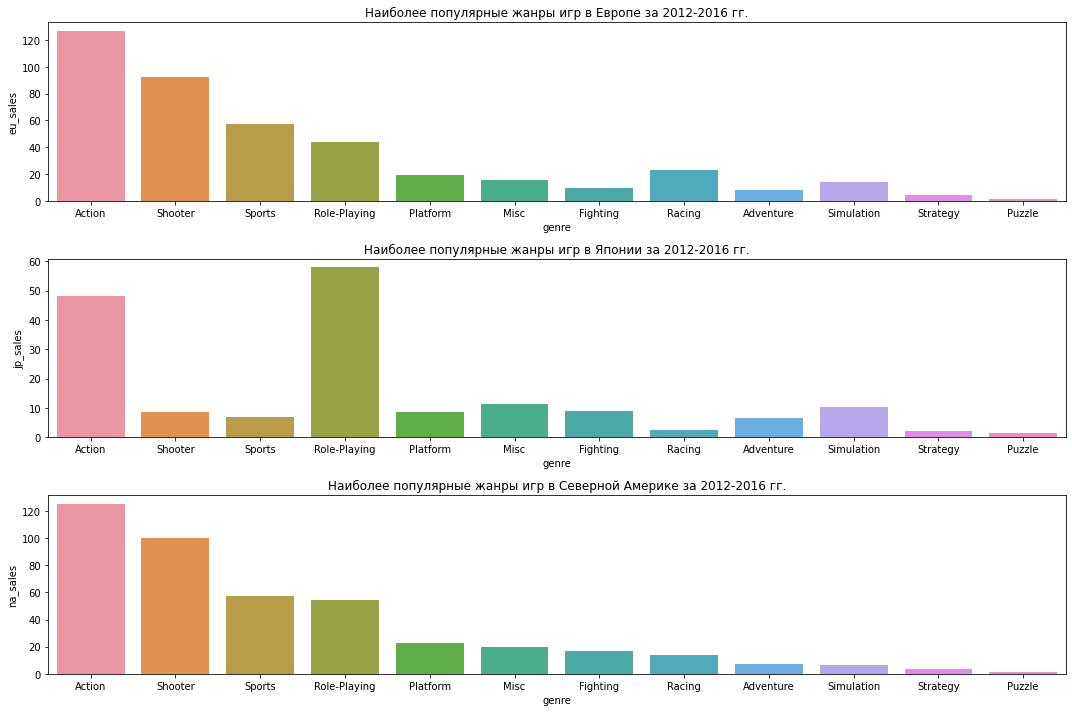

In [102]:
#рисуем все графики на одной фигуре

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


sns.barplot(x = 'genre', y='eu_sales', data=genre_top, ax=ax1)
sns.barplot(x = 'genre', y='jp_sales', data=genre_top, ax=ax2)
sns.barplot(x = 'genre', y='na_sales', data=genre_top, ax=ax3)

ax1.set(title='Наиболее популярные жанры игр в Европе за 2012-2016 гг.')
ax2.set(title='Наиболее популярные жанры игр в Японии за 2012-2016 гг.')
ax3.set(title='Наиболее популярные жанры игр в Северной Америке за 2012-2016 гг.');

fig.tight_layout() #убирем наслоение 



#### Выводы:


Мы определили самые популярные жанры в разных регионах:

1. Топ-5 жанров для Европы составляет:
* action
* shooter
* sports
* role-playing
* racing 

2. Топ-5 жанров для Японии составляет:
* role-playing
* action 
* misc
* simulation 
* fighting

3. Топ-5 жанров для Северной Америки составляет:
* action
* shooter
* role-playing
* sports
* platform

В Европе и Северной Америке наиболее популярными платформами являются `PS3` и `PS4`, а на этих платформах наиболее популярные жанры это `shooter`, `action` и `sport`. 

В Японии наиболее популярная платформа `3DS`, а для платформы `3DS` наиболее популярные жанры - это `role-playing`, `simulation` и `fighting`.


### Влияние рейтинга  ESRB на продажи в регионе

Рассмотрим, влияет ли рейтинг ESRB на количество проданных копий в каждом регионе.

In [103]:
df_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [104]:
#формируем  сводную таблицу 
rating_pivot = df_popular.pivot_table(index='rating',
                           values=['na_sales', 'eu_sales', 'jp_sales'],
                           aggfunc='sum')
rating_pivot = rating_pivot.reset_index()
rating_pivot

,rating,eu_sales,jp_sales,na_sales
0,E,94.67,26.75,86.67
1,E10+,38.65,7.85,47.79
2,M,156.31,20.12,157.17
3,T,45.65,25.48,51.94
4,unknown,81.15,93.23,85.18


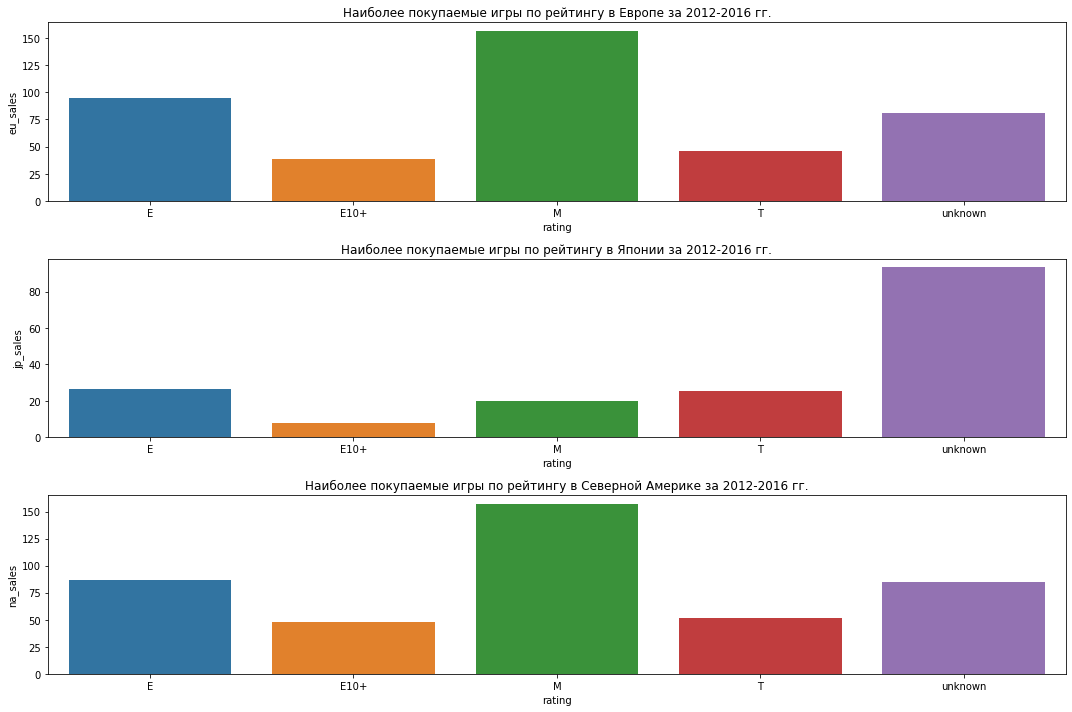

In [105]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


sns.barplot(x = 'rating', y='eu_sales', data=rating_pivot, ax=ax1)
sns.barplot(x = 'rating', y='jp_sales', data=rating_pivot, ax=ax2)
sns.barplot(x = 'rating', y='na_sales', data=rating_pivot, ax=ax3)

ax1.set(title='Наиболее покупаемые игры по рейтингу в Европе за 2012-2016 гг.')
ax2.set(title='Наиболее покупаемые игры по рейтингу в Японии за 2012-2016 гг.')
ax3.set(title='Наиболее покупаемые игры по рейтингу в Северной Америке за 2012-2016 гг.');

fig.tight_layout()


#### Выводы:

По графикам можно сказать, что в зависимости от региона количество проданных копий в категориях рейтинга отличается:

* в Европе больше всего проданных копий игр с рейтингом `M`, `E` и `unknown`.
* в Японии больше всего проданных копий игр с рейтингом `unknown`,`T` и `E`
* в Северной Америке  больше всего проданных копий игр с рейтингом `M`, `E` и `unknown`

Напомню:
* рейтинг `M` - «M» («Mature») — «Для взрослых»
* рейтинг `T` - «T» («Teen») — «Подросткам»
* рейтинг `E` - «E» («Everyone») — «Для всех»
* рейтинг `unknown` - "заглушка" установленная в начале исследования, для выделения игр без рейтинга в отдельную группу

Таким образом, мы видим, что:
* количество проданных копий игр в категориях рейтинга `ESBR` отличается в зависимости от региона, то есть рейтинг влияет на количество продаж только в определных регионах
* в Японии рейтинг `ESBR` меньше всего влияет на количество проданных копий, в этом регионе наиболее популярные игры не имеют рейтинга по `ESBR`(рейтинг`unknown`). Возможнно, ввиду наличия собственной системы присваивания рейтинга
* в Европе и Северной Америке наиболее покупаемые игры по рейтингу совпадают полностью (рейтинг `ESBR`=`M`)

## Проверка гипотез

### Гипотеза № 1: Средний рейтинг пользователей платформ Xbox One и PC отличается

* Нулевая гипотеза: средние рейтинги пользователей платформ Xbox One и PC равны
* Альтернативная гипотеза: средние рейтинги пользователей платформ Xbox One и PC не равны

Для проведения статистического теста в таблице не должно быть пропусков. Создадим таблицу, без пропусков в столбце "оценка пользователей":

In [106]:
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2336 non-null   object 
 1   platform         2336 non-null   object 
 2   year_of_release  2336 non-null   int32  
 3   genre            2336 non-null   object 
 4   na_sales         2336 non-null   float64
 5   eu_sales         2336 non-null   float64
 6   jp_sales         2336 non-null   float64
 7   other_sales      2336 non-null   float64
 8   critic_score     1134 non-null   float64
 9   user_score       1272 non-null   float64
 10  rating           2336 non-null   object 
 11  total_sale       2336 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 292.7+ KB


In [107]:
platform_df = df_popular.dropna(subset=['user_score']) #удаляем пропуски 
platform_df.info()#проверяем, что строки с пропусками удалены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1272 non-null   object 
 1   platform         1272 non-null   object 
 2   year_of_release  1272 non-null   int32  
 3   genre            1272 non-null   object 
 4   na_sales         1272 non-null   float64
 5   eu_sales         1272 non-null   float64
 6   jp_sales         1272 non-null   float64
 7   other_sales      1272 non-null   float64
 8   critic_score     1119 non-null   float64
 9   user_score       1272 non-null   float64
 10  rating           1272 non-null   object 
 11  total_sale       1272 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 124.2+ KB


In [108]:
alpha = .05

results = st.ttest_ind(platform_df.query('platform =="XOne"')['user_score'], platform_df.query('platform =="PC"')['user_score'])
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 0.5535080500643661
Не удалось отвергнуть нулевую гипотезу


#### Вывод:


Гипотеза, о том что средние рейтинги пользователей платформ Xbox One и PC равны - нет оснований отвергнуть нулевую гипотезу.

Гипотеза, о том что средние рейтинги пользователей платформ Xbox One и PC не равны - отвергается.

### Гипотеза № 2: Средний рейтинг пользователей жанров "экшн" и "спорт" отличается

* Нулевая гипотеза: средние пользовательские рейтинги жанров "экшн" и "спорт" равны.
* Альтернативная гипотеза: средние пользовательские рейтинги жанров "экшн" и "спорт" не равны 

Сформируем таблицы с данными только по этим жанрам:

In [109]:
alpha = .05

results = st.ttest_ind(platform_df.query('genre == "Action"')['user_score'], platform_df.query('genre == "Sports"')['user_score'])
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 6.446370397444354e-21
Отвергаем нулевую гипотезу


####  Вывод:

Таким образом, нулевая гипотеза, согласно которой средние пользовательские рейтинги жанров "экшн" и "спорт" равны- отвергается.

Альтернативная гипотеза, о том что средние пользовательские рейтинги жанров "экшн" и "спорт" не равны - нет оснований отвергнуть данную гипотезу.

## Общий вывод:



На этапе предобработке данных мы:


1. Исправили нарушения хорошего стиля в названиям столбцов 

2. Изменили тип данных на соотествующий содержанию столбца: 

* `Year_of_Release`, где указан год релиза, на тип данных `float`
* `User_Score`, где указана оценка пользователей,на тип данных `odject`


5. Пропуски в столбцах:
Удалили пропуски в столбце: 
* `Year_of_Release`(год релиза) - 1.6 %
Из-за отсутсвия качественной замены пропусков, оставили пропуски в следующих столбцах: 
* `Critic_Score`(оценка критиков) - 51 %
* `User_Score`(оценка пользователей) - 40 %
"Установили заглушку" в следующем столбце:
* `Rating`(рейтинг игры по ESRB) - 40 %


6. Удалили данные, которые не подлежали восстановлению:
* `Name`(название игры) - 0.01 % 
* `Genre`(жарн игры) - 0.01 %

На этапе исследовательского анализа, выяснили что:

1. На какие платформы выпускалось больше всего игр, то есть какие платформы наиболее популярны? 

Наиболее популярные платформы - это платформы, но которые количество игр, выпущенных за все года больше 1000 игр:

* DS
* PS2
* Wii
* PS3
* PS
* PSP
* X360

2. Какой период (в годах) является актуальным для анализа. 

Срок исчезновения игр на платформу (то есть исчезновения самой платформы) - 10 лет 
Актуальный период жизни платформы - 4 года


3. Выявили платформы, которые лидируют по продажам и потенциально самые прибыльные:

Платформы, которые лидируют по продажам и потенциально самые прибыльные. Общая прибыль за актуальный период больше всего на платформах: 
* PS3
* PS4
* XOne
* 3DS
* PSV
* PC
* WiiU


4. Рассмотрели продажи по наиболее потенциально прибыльным платформам:

Выявили, что продажи между наиболее популярным платформам распределены не равномерно.

Есть платформы, где количество "успешных" игр намного больше: 
  * PS4
  * PS3
  * XOne
  * WiiU
  * 3DS


Есть платформы, где количество "успешных" игр намного меньше: 
  * PS
  * PSV
  
5. Рассмотрели влияние оценок на продажи для каждой платформы.

Выявили, что:  
* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе WiiU

* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы, а так же между оценкой пользователей и суммарным количеством проданных копий на платформе 3DS

* есть положительная умеренная корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PS4, PS3, XOne
* есть положительная слабая корреляция между оценками критиков и суммарным количеством проданных копий на платформы: PC

* корреляции между оценкой критиков или пользователей и суммарным количеством проданных копий нет на платформу PSV.


6. Рассмотрели распределение игр по жанрам.

* Выявили, что распределение по жанрам для всех платформ не одинаковое: на разыне платформы спрос в жанрах разный.


* Выяснили, что медианное количество продаж по жанрам неравномерно:


Наиболее прибыльные жанры-это жанры, медиана количества продаж которых более 200 тыс копий:

* shooter (самый прибыльный жанр)
* sports
* platform


Наименее прибыльные жанры-это жанры, медиана количества продаж котрых менее 50 тыс копий:
* puzzle
* adventure

Медиана количества проданных копий остальных жанров находится в промежутке от 50 тыс до 150 тыс копий:
* role-playing
* fighting
* racing
* action
* simulation
* misc
* strategy 

Так же отметим, что есть:

* жанр с наиболее высокой медианой количества проданных копий - это shooter
* жанр с наиболее низкиой медианой количества проданных копий - это adventure

**Таким образом, на эатпе исследовательского анализа, мы выяснили, что на успешность игры в целом влияет:**

* жанр игры
* платформа 


7. Рассмотрели пользователей разных регионов и выяснили, что:

Самые популярные платформы и жанры отличаются в разных регионах:

Для Европы:


Топ-5 платформ:
* PS4(наиболее популярная)
* PS3
* XOne
* 3DS
* PC 


Топ-5 жанров:
* action
* shooter
* sports
* role-playing
* racing 

Для Японии:


Топ-5 платформ:
* 3DS(наиболее популярная)
* PS3 
* PS4
* PSV 
* WiiU


Топ-5 жанров:
* role-playing
* action 
* misc
* simulation 
* fighting


Для Северной Америки:


Топ-5 платфор
* PS4(наиболее популярная)
* PS3
* XOne
* 3DS
* WiiU


Топ-5 жанров:
* action
* shooter
* role-playing
* sports
* platform

8. Изучили влияние рейтинга ESRB и выяснили, что:

Количество проданных копий игр в категориях рейтинга `ESBR` отличается в зависимости от региона, то есть рейтинг не во всех регионах влияет на продажи: 
* в Японии рейтинг `ESBR` меньше, чем в других странах влияет на количество проданных копий, в этом регионе наиболее популярные игры не имеют рейтинга по `ESBR`(рейтинг`unknown`). Возможнно, ввиду наличия собственной системы присваивания рейтинга
* в Европе и Северной Америке наиболее покупаемые игры по рейтингу совпадают полностью (рейтинг `ESBR`=`M`)


9. Сформулировали гипотезы:

* Средние рейтинги пользователей платформ Xbox One и PC равны
* Средние рейтинги пользователей жанров Action и Sports разные


10. Проверили гипотезы и выяснили, что:

* Гипотеза, о том что средние рейтинги пользователей платформ Xbox One и PC равны - нет оснований отвергнуть данную гипотезу.


* Гипотеза, о том что средние пользовательские рейтинги жанров "экшн" и "спорт" не равны - нет оснований отвергнуть  данную гипотезу.